In [1]:
!jupyter nbconvert --to python nutrition_local.ipynb


[NbConvertApp] Converting notebook nutrition_local.ipynb to python
[NbConvertApp] Writing 10879 bytes to nutrition_local.py


In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

path = "db_nutrition.csv"

df = pd.read_csv(path)

#前処理

In [3]:
df = df.fillna(0)

In [4]:
df = df.rename(columns={
    'Unnamed: 0': '食品群',
    'Unnamed: 1': '食品番号',
    'Unnamed: 2': '索引番号',
    '単位': "食品名",
    '%': "廃棄率(%)",
    'kJ': "エネルギー(kJ)",
    'kcal': "エネルギー(kcal)",
    '(…………… g ………………)': "水分(g)",
    'Unnamed: 8': 'アミノ酸組成によるたんぱく質(g)',
    'Unnamed: 9': 'たんぱく質(g)',
    'Unnamed: 10': '脂肪酸のトリアシルグリセロール当量(g)',
    'mg': 'コレステロール(mg)',
    '(……………………………… g ……………………………)': '脂質(g)',
    'Unnamed: 13': '利用可能炭水化物(単糖当量)(g)',
    'Unnamed: 14': 'Name1',
    'Unnamed: 15': '利用可能炭水化物(質量計)(g)',
    'Unnamed: 16': '差引き法による利用可能炭水化物(g)',
    'Unnamed: 17': 'Name2',
    'Unnamed: 18': '食物繊維総量(g)',
    'Unnamed: 19': '糖アルコール(g)',
    'Unnamed: 20': '炭水化物(g)',
    'Unnamed: 21': '有機酸(g)',
    'Unnamed: 22': '灰分(g)',
    '(…………………………… mg ……………………………)': 'ナトリウム(mg)',
    'Unnamed: 24': 'カリウム(mg)',
    'Unnamed: 25': 'カルシウム(mg)',
    'Unnamed: 26': 'マグネシウム(mg)',
    'Unnamed: 27': 'リン(mg)',
    'Unnamed: 28': '鉄(mg)',
    'Unnamed: 29': '亜鉛(mg)',
    'Unnamed: 30': '銅(mg)',
    'Unnamed: 31': 'マンガン(mg)',
    'Unnamed: 32': 'Name3',
    '(…………………………………… μg………………………………………)': 'ヨウ素(μg)',
    'Unnamed: 34': 'セレン(μg)',
    'Unnamed: 35': 'クロム(μg)',
    'Unnamed: 36': 'モリブデン(μg)',
    'Unnamed: 37': 'レチノール(μg)',
    'Unnamed: 38': 'a-カロテン(μg)',
    'Unnamed: 39': 'β-カロテン(μg)',
    'Unnamed: 40': 'β-クリプトキサンチン(μg)',
    'Unnamed: 41': 'β-カロテン当量(μg)',
    'Unnamed: 42': 'レチノール活性当量(μg)',
    'Unnamed: 43': 'ビタミンD(μg)',
    '(………… mg …………)': 'a-トコフェロール(mg)', 
    'Unnamed: 45': 'β-トコフェロール(mg)',
    'Unnamed: 46': 'γ-トコフェロール(mg)',
    'Unnamed: 47': 'σ-トコフェロール(mg)',
    'μg': 'ビタミンK(μg)',
    '(…………… mg ……………)': 'ビタミンB1(mg)',
    'Unnamed: 50': 'ビタミンB2(mg)',
    'Unnamed: 51': 'ナイアシン(mg)',
    'Unnamed: 52': 'ナイアシン当量(mg)',
    'Unnamed: 53': 'ビタミンB6(mg)',
    '(…… μg……)': 'ビタミンB12(μg)',
    'Unnamed: 55': '葉酸(μg)',
    'mg.1': 'バントテン酸(mg)',
    'μg.1': 'ビオチン(μg)',
    'mg.2': 'ビタミンC(mg)',
    '(……g……)': 'アルコール(g)',
    'Unnamed: 60': '食塩相当量(g)',
    'Unnamed: 61': 'Name4',
    'Unnamed: 62': 'Name5',
    'Unnamed: 63': 'Name6',
    'Unnamed: 64': 'Name7'
})

In [5]:
# 一行目（インデックス0）の削除
df = df.drop(index=0).reset_index(drop=True)

In [6]:
#Name削除
df = df.drop(columns=[col for col in df.columns if 'Name' in col])

In [ ]:
# データフレーム内の全てのセルの値で () と - , Trを 置換
df = df.applymap(lambda x: x.replace('(', '').replace(')', '').replace('-', '0').replace('Tr', '0') if isinstance(x, str) else x)

C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\920767670.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('(', '').replace(')', '').replace('-', '0').replace('Tr', '0') if isinstance(x, str) else x)


In [8]:
# 空白文字（スペースやタブなど）を含むセルの空白文字を削除
import re

df = df.applymap(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)

C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\1478160415.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)


In [ ]:
df.dtypes

In [9]:
# すべての列（食品名以外）をfloat型に変換（object型のみ対象）
for col in df.columns:
    if col != '食品名':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 変換後の型を確認
print(df.dtypes)

食品群                     float64
食品番号                    float64
索引番号                      int64
食品名                      object
廃棄率(%)                    int64
エネルギー(kJ)                 int64
エネルギー(kcal)               int64
水分(g)                   float64
アミノ酸組成によるたんぱく質(g)       float64
たんぱく質(g)                float64
脂肪酸のトリアシルグリセロール当量(g)    float64
コレステロール(mg)               int64
脂質(g)                   float64
利用可能炭水化物(単糖当量)(g)       float64
利用可能炭水化物(質量計)(g)        float64
差引き法による利用可能炭水化物(g)      float64
食物繊維総量(g)               float64
糖アルコール(g)               float64
炭水化物(g)                 float64
有機酸(g)                  float64
灰分(g)                   float64
ナトリウム(mg)                 int64
カリウム(mg)                  int64
カルシウム(mg)                 int64
マグネシウム(mg)                int64
リン(mg)                    int64
鉄(mg)                   float64
亜鉛(mg)                  float64
銅(mg)                   float64
マンガン(mg)                float64
ヨウ素(μg)                 float64
セレン(μg) 

In [10]:
df.to_csv("new_nutrition_db.csv", index=False)

#相関分析

db

                           食品群      食品番号      索引番号    廃棄率(%)  エネルギー(kJ)  \
食品群                   1.000000  0.999676  0.105419 -0.063710   0.128231   
食品番号                  0.999676  1.000000  0.110197 -0.060132   0.123468   
索引番号                  0.105419  0.110197  1.000000  0.016388   0.015928   
廃棄率(%)               -0.063710 -0.060132  0.016388  1.000000  -0.207787   
エネルギー(kJ)             0.128231  0.123468  0.015928 -0.207787   1.000000   
エネルギー(kcal)           0.130640  0.125903  0.016828 -0.206557   0.999831   
水分(g)                -0.059369 -0.053596 -0.005265  0.231944  -0.866771   
アミノ酸組成によるたんぱく質(g)     0.070726  0.075182  0.022365  0.034932   0.244819   
たんぱく質(g)              0.090659  0.095851  0.047308  0.042728   0.244337   
脂肪酸のトリアシルグリセロール当量(g)  0.195763  0.193544  0.028274 -0.108797   0.782077   
コレステロール(mg)           0.172369  0.176462  0.018381  0.027810   0.133161   
脂質(g)                 0.199105  0.197038  0.039730 -0.109806   0.792620   
利用可能炭水化物(単糖当量)(g)    -0.1

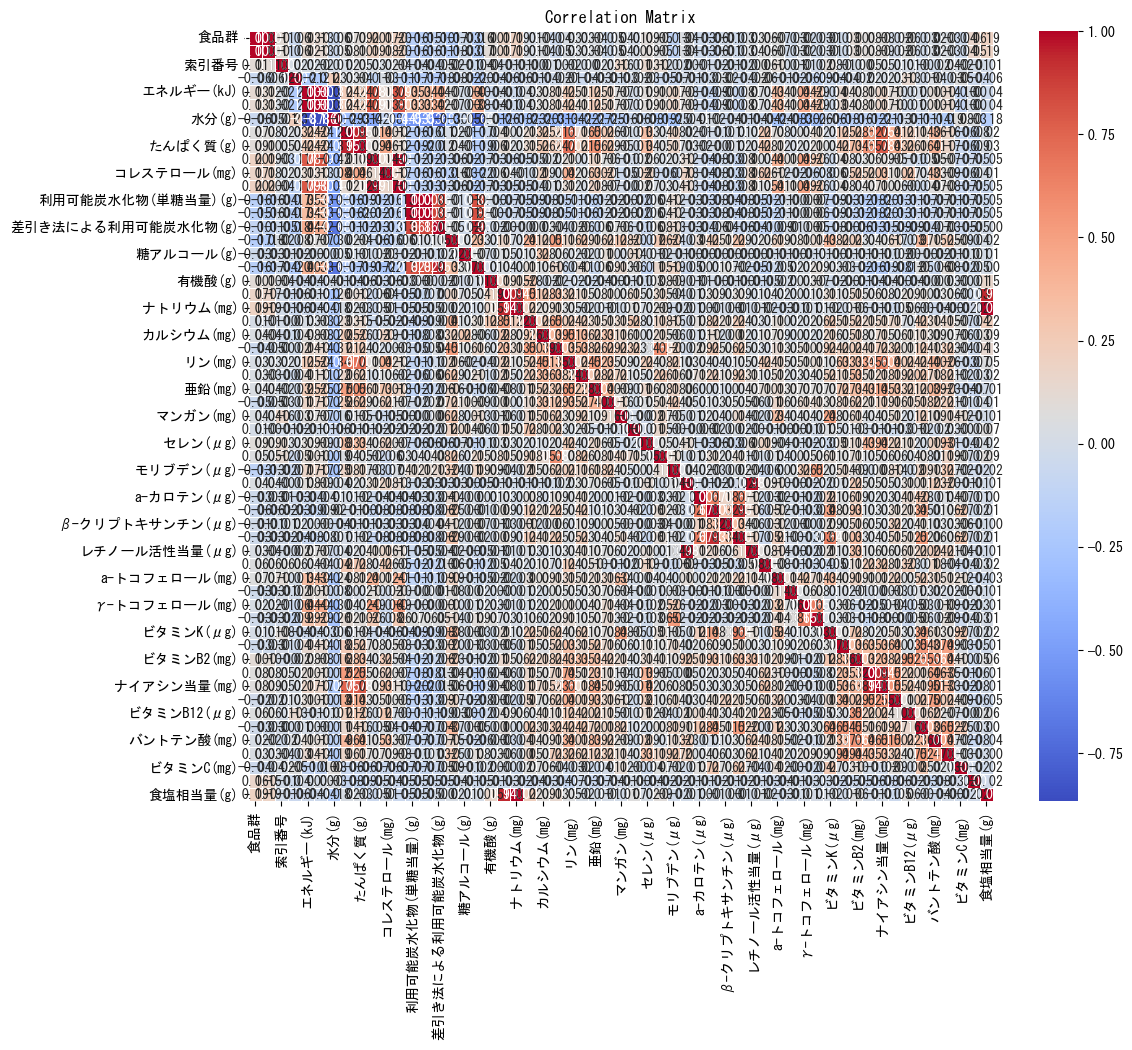

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# 日本語フォントを明示的に指定
# Windowsの場合の例（MS Gothic）
plt.rcParams['font.family'] = 'MS Gothic'

# 相関行列を計算
df_numeric = df.select_dtypes(exclude=['object'])

correlation_matrix = df_numeric.corr()
pprint(correlation_matrix)
# 相関行列を画像ファイルに保存
correlation_matrix.to_csv("correlation_matrix.txt", sep='\t')


# ヒートマップで可視化
plt.figure(figsize=(12, 10))  # 図のサイズを指定
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontname='MS Gothic')
plt.show()

健康度 計算

可食部100g当たりの食品のデータ

#一日
コレステロール750mg,
ナトリウム4.5g/1000kcal,
脂質25%/ene

#人間は一日2kgの食事をとると仮定

In [11]:
#式定義

df["コレステロール(mg)"] / 100 > 750 / 2000
df["ナトリウム(mg)"]*1000 / df["エネルギー(kcal)"] > 4.5 / 1000

df["利用可能炭水化物(質量計)(g)"] / df["エネルギー(kcal)"] > 0.107
df["脂質(g)"] / df["エネルギー(kcal)"] > 0.25
#df['脂肪酸のトリアシルグリセロール当量(g)']
#利用可能炭水化物(単糖当量)(g),利用可能炭水化物(質量計)(g)
#差引き法による利用可能炭水化物(g)
#糖アルコール(g)
##炭水化物(g)

0       False
1       False
2       False
3       False
4       False
        ...  
2533    False
2534    False
2535    False
2536    False
2537    False
Length: 2538, dtype: bool

In [13]:
import pandas as pd

def add_unhealthy_label(df: pd.DataFrame) -> pd.DataFrame:
    
    cond1 = df["コレステロール(mg)"] / 100 > 750 / 2000
    cond2 = df["ナトリウム(mg)"]*1000 / df["エネルギー(kcal)"] > 4.5 / 1000
    cond3 = df["利用可能炭水化物(質量計)(g)"] / df["エネルギー(kcal)"] > 0.107
    
    # Trueの合計が2つ以上なら不健康
    conditions_sum = cond1.astype(int) + cond2.astype(int) + cond3.astype(int)
    df["unhealthy"] = (conditions_sum >= 2).astype(int)
    
    return df


In [14]:
df = add_unhealthy_label(df)
print(df[["unhealthy"]].value_counts())

df.to_csv("feature&label_nutrition_db.csv", index=False)

unhealthy
1            1444
0            1094
Name: count, dtype: int64


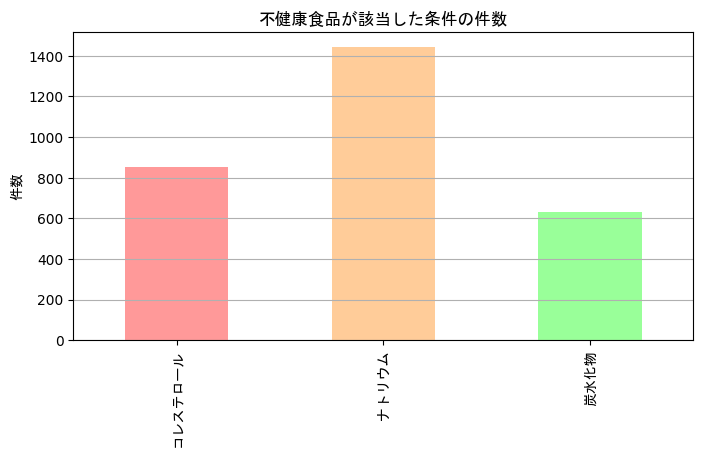

In [15]:
# "unhealthy"が1の行について、どの条件(cond1, cond2, cond3, cond4)に該当しているか可視化

import matplotlib.pyplot as plt

# 条件ごとの判定列を追加
df['cond1'] = (df["コレステロール(mg)"] / 100 > 750 / 2000).astype(int)
df['cond2'] = (df["ナトリウム(mg)"] * 1000 / df["エネルギー(kcal)"] > 4.5 / 1000).astype(int)
df['cond3'] = (df["利用可能炭水化物(質量計)(g)"] / df["エネルギー(kcal)"] > 0.107).astype(int)

# "unhealthy"が1の行だけ抽出
unhealthy_df = df[df["unhealthy"] == 1]

# 各条件に該当している食品数を集計
cond_counts = unhealthy_df[['cond1', 'cond2', 'cond3']].sum()

# 棒グラフで可視化
plt.figure(figsize=(8,4))
cond_counts.plot(kind='bar', color=['#FF9999', '#FFCC99', '#99FF99'])
plt.title('不健康食品が該当した条件の件数', fontname='MS Gothic')
plt.ylabel('件数', fontname='MS Gothic')
plt.xticks([0,1,2], ['コレステロール', 'ナトリウム', '炭水化物'], fontname='MS Gothic')
plt.grid(axis='y')
plt.show()

In [16]:
# "unhealthy"が1の行の食品名だけ表示
print(df.loc[df["unhealthy"] == 1, "食品名"])

0           アマランサス玄穀
1              あわ精白粒
3         えんばくオートミール
4         おおむぎ七分つき押麦
5            おおむぎ押麦乾
            ...     
2528    洋風料理その他えびピラフ
2531    中国料理点心類中華ちまき
2532      中国料理点心類春巻き
2534     中国料理菜類チャーハン
2535       中国料理菜類八宝菜
Name: 食品名, Length: 1444, dtype: object


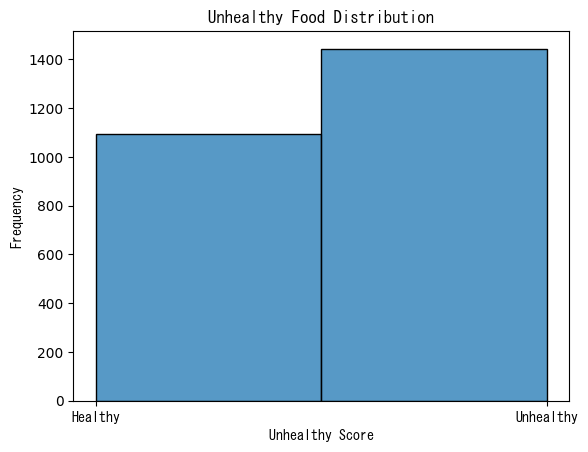

In [17]:
import seaborn as sns
sns.histplot(df["unhealthy"],bins=2)
plt.title('Unhealthy Food Distribution', fontname='MS Gothic')
plt.xlabel('Unhealthy Score', fontname='MS Gothic')
plt.xticks([0, 1], ['Healthy', 'Unhealthy'], fontname='MS Gothic')
plt.ylabel('Frequency', fontname='MS Gothic')
plt.show()

In [18]:
#特徴量重要度がQ1よりしただったもの
"""
鉄(mg): 0.0190
ビタミンB6(mg): 0.0181
セレン(μg): 0.0175
モリブデン(μg): 0.0174
有機酸(g): 0.0154
a-トコフェロール(mg): 0.0153
β-カロテン当量(μg): 0.0153
ビタミンB1(mg): 0.0146
ビタミンK(μg): 0.0142
ビタミンB2(mg): 0.0140
レチノール活性当量(μg): 0.0140
β-カロテン(μg): 0.0129
ビタミンC(mg): 0.0128
γ-トコフェロール(mg): 0.0119
σ-トコフェロール(mg): 0.0105
クロム(μg): 0.0104
β-クリプトキサンチン(μg): 0.0097
ヨウ素(μg): 0.0086
a-カロテン(μg): 0.0064
β-トコフェロール(mg): 0.0052
アルコール(g): 0.0020
"""

'\n鉄(mg): 0.0190\nビタミンB6(mg): 0.0181\nセレン(μg): 0.0175\nモリブデン(μg): 0.0174\n有機酸(g): 0.0154\na-トコフェロール(mg): 0.0153\nβ-カロテン当量(μg): 0.0153\nビタミンB1(mg): 0.0146\nビタミンK(μg): 0.0142\nビタミンB2(mg): 0.0140\nレチノール活性当量(μg): 0.0140\nβ-カロテン(μg): 0.0129\nビタミンC(mg): 0.0128\nγ-トコフェロール(mg): 0.0119\nσ-トコフェロール(mg): 0.0105\nクロム(μg): 0.0104\nβ-クリプトキサンチン(μg): 0.0097\nヨウ素(μg): 0.0086\na-カロテン(μg): 0.0064\nβ-トコフェロール(mg): 0.0052\nアルコール(g): 0.0020\n'

In [19]:
from sklearn.model_selection import train_test_split
from transformers.trainer_utils import set_seed

feature_columns = [col for col in df.columns if col not in [
    '炭水化物(g)' ,'糖アルコール(g)', '差引き法による利用可能炭水化物(g)',
    '利用可能炭水化物(質量計)(g)', '利用可能炭水化物(単糖当量)(g)', '脂肪酸のトリアシルグリセロール当量(g)',
    '食品名', '食品群', '食品番号', '索引番号', '廃棄率(%)', 'エネルギー(kJ)', 'コレステロール(mg)',
    '食塩相当量(g)', 'ナトリウム(mg)', '脂質(g)', 'エネルギー(kcal)', 'unhealthy', 'cond1', 'cond2',
    'cond3', 
    '鉄(mg)', 'ビタミンB6(mg)', 'セレン(μg)', 'モリブデン(μg)', '有機酸(g)', 'a-トコフェロール(mg)',
    'β-カロテン当量(μg)', 'ビタミンB1(mg)', 'ビタミンK(μg)', 'ビタミンB2(mg)', 'レチノール活性当量(μg)',
    'β-カロテン(μg)', 'ビタミンC(mg)', 'γ-トコフェロール(mg)', 'σ-トコフェロール(mg)', 'クロム(μg)',
    'β-クリプトキサンチン(μg)', 'ヨウ素(μg)', 'a-カロテン(μg)', 'β-トコフェロール(mg)', 'アルコール(g)'
    
    
    
    ]]
data = df[feature_columns].values
label = df['unhealthy']


set_seed(42)


c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


分類

In [20]:
x_train,x_val,y_train,y_val = train_test_split(data, label, test_size=0.3, random_state=42)

In [21]:
# 欠損値を0で埋める
x_train = pd.DataFrame(x_train).fillna(0).values
x_val = pd.DataFrame(x_val).fillna(0).values

In [22]:
print(y_train[0:10])
print(y_train.shape)
print(df.shape)

1990    1
1456    1
514     1
409     0
2017    0
313     1
1936    1
1017    0
2379    1
916     1
Name: unhealthy, dtype: int64
(1776,)
(2538, 62)


In [23]:
# クラス分布の確認
print(label.value_counts())
print("クラス数:", label.nunique())

unhealthy
1    1444
0    1094
Name: count, dtype: int64
クラス数: 2


In [25]:
x_train

array([[7.75e+01, 9.80e+00, 1.10e+01, ..., 4.20e+01, 1.03e+00, 2.20e+01],
       [7.60e+01, 1.75e+01, 2.12e+01, ..., 1.20e+01, 8.60e-01, 8.40e+00],
       [9.39e+01, 5.00e-01, 6.00e-01, ..., 4.90e+01, 2.30e-01, 1.00e+00],
       ...,
       [1.52e+01, 0.00e+00, 9.00e+00, ..., 4.40e+01, 3.80e-01, 0.00e+00],
       [7.56e+01, 1.95e+01, 2.14e+01, ..., 4.00e+00, 7.30e-01, 1.50e+01],
       [9.53e+01, 6.00e-01, 8.00e-01, ..., 4.40e+01, 6.00e-02, 0.00e+00]],
      shape=(1776, 20))

#チューニング

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

search_gs = {
    "class_weight": ["balanced", "balanced_subsample", None],
    "max_depth": [None, 5, 10, 20, 30],
    "n_estimators": [100, 130, 150, 180, 200],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": [None, "sqrt", "log2"]
}

model_gs = RandomForestClassifier(random_state=42)

gs = GridSearchCV(
    estimator=model_gs,
    param_grid=search_gs,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
    
)

gs.fit(x_train, y_train)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)


Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameters: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best score: 0.8602384119008916


＃学習

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
                               max_depth=20,
                               class_weight='balanced_subsample',
                               criterion='entropy',
                               max_features='sqrt',
                               n_estimators=100,
                               random_state=42,
                            )
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'RandomForest Accuracy:{accuracy:.3f}')

RandomForest Accuracy:0.865


In [ ]:
!pip install pydotplus graphviz

^C



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

estimators = model.estimators_
dot_data = export_graphviz(estimators[0],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           class_names=['Healthy', 'Unhealthy'],
                           feature_names=feature_columns,
                           special_characters=True,
                           fontname='MS Gothic'
                        )

graph = graph_from_dot_data(dot_data)
graph.progs = {'dot': 'C:\\Users\\bi23014\\windows_10_cmake_Release_Graphviz-12.2.1-win64\\Graphviz-12.2.1-win64\\bin\\dot.exe'}  # Graphvizのパスを指定
graph.write_png('decision_tree.png')




True

＃評価

In [29]:
#score - 汎用性能・テスト性能を測る
y_train_score = model.score(x_train,y_train)
print("Train Score: ", y_train_score)

y_val_score = model.score(x_val,y_val)
print("Validation Score: ", y_val_score)

Train Score:  0.9994369369369369
Validation Score:  0.8648293963254593


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.804     0.905     0.852       327
           1      0.921     0.834     0.876       435

    accuracy                          0.865       762
   macro avg      0.863     0.870     0.864       762
weighted avg      0.871     0.865     0.865       762



In [31]:
#特徴量の重要度
fti = model.feature_importances_
print('feature importances:')

sorted_features = sorted(zip(feature_columns, fti), key=lambda x: x[1], reverse=True)

for feat, score in sorted_features:
    print(f"{feat}: {score:.4f}")


feature importances:
水分(g): 0.1101
ビタミンB12(μg): 0.0918
アミノ酸組成によるたんぱく質(g): 0.0655
たんぱく質(g): 0.0617
レチノール(μg): 0.0608
カルシウム(mg): 0.0587
食物繊維総量(g): 0.0529
カリウム(mg): 0.0475
リン(mg): 0.0462
マグネシウム(mg): 0.0445
バントテン酸(mg): 0.0441
灰分(g): 0.0439
葉酸(μg): 0.0420
ナイアシン当量(mg): 0.0391
マンガン(mg): 0.0388
銅(mg): 0.0363
ビオチン(μg): 0.0341
ナイアシン(mg): 0.0307
ビタミンD(μg): 0.0257
亜鉛(mg): 0.0256


C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\3181424907.py:7: UserWarning: Glyph 20124 (\N{CJK UNIFIED IDEOGRAPH-4E9C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\3181424907.py:7: UserWarning: Glyph 37467 (\N{CJK UNIFIED IDEOGRAPH-925B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\3181424907.py:7: UserWarning: Glyph 12499 (\N{KATAKANA LETTER BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\3181424907.py:7: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\3181424907.py:7: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_31428\3181424907.py:7: UserWarning: Glyph 12531 (\N{KATAKANA LETTER 

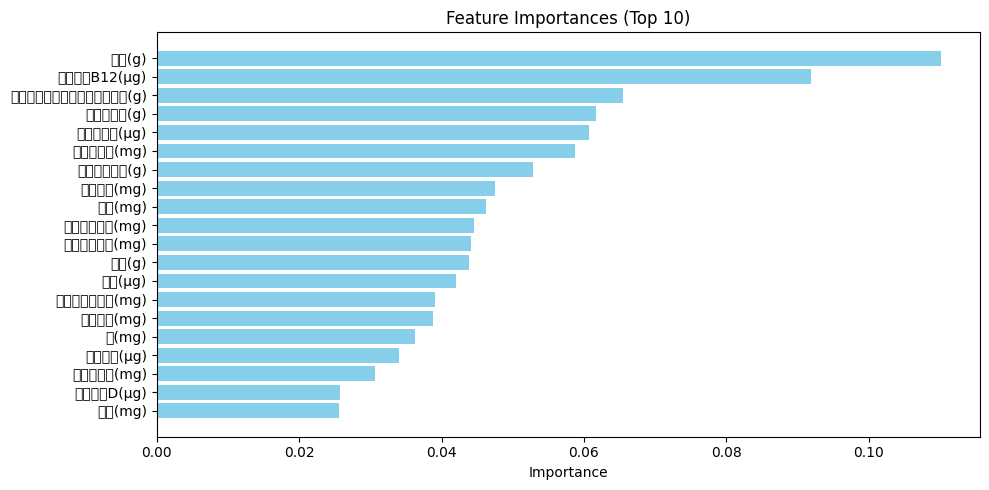

In [32]:
feature_list = [feat for feat, score in sorted_features]
score_list = [score for feat, score in sorted_features]
plt.figure(figsize=(10, 5))
plt.barh(feature_list[::-1], score_list[::-1], color='skyblue')  # 上位が上に来るよう[::-1]
plt.xlabel('Importance')
plt.title('Feature Importances (Top 10)')
plt.tight_layout()
plt.show()

In [33]:
# listに格納し記述統計量を計算
import numpy as np

def describe_scores(scores: list):
    print("平均:", np.mean(scores))
    print("中央値:", np.median(scores))
    print("最大値:", np.max(scores))
    print("最小値:", np.min(scores))
    print("標準偏差:", np.std(scores))
    print("分散:", np.var(scores))
    print("四分位数:", np.percentile(scores, [25, 75]))

des_list = [score for feat, score in sorted_features]
describe_scores(des_list)    

平均: 0.05
中央値: 0.04430846503884775
最大値: 0.11011026809131551
最小値: 0.0256045000209336
標準偏差: 0.020457262897331536
分散: 0.0004184996052505375
四分位数: [0.03819532 0.05919303]


0.948061443284474


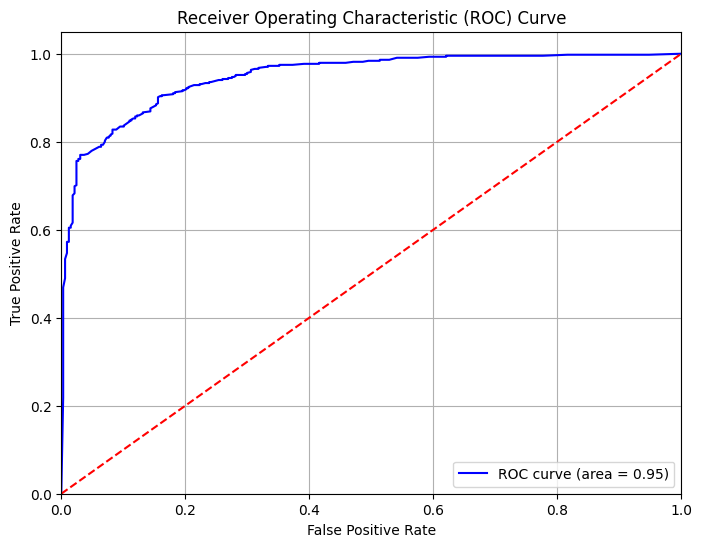

In [34]:
#ROC曲線とAUCの計算
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()



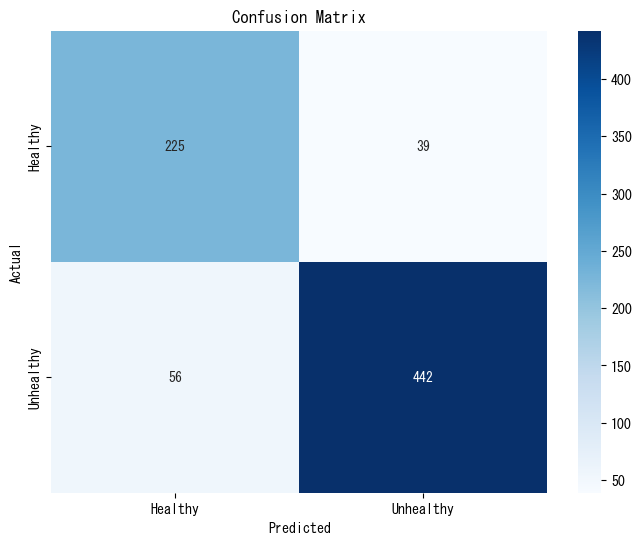

In [121]:
# 混同行列を計算して表示
cm = confusion_matrix(y_val, y_pred)
# 混同行列をヒートマップとして表示
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Healthy', 'Unhealthy'],
    yticklabels=['Healthy', 'Unhealthy'],
    annot_kws={"size": 10}
    )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.tick_params(labelsize=14)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


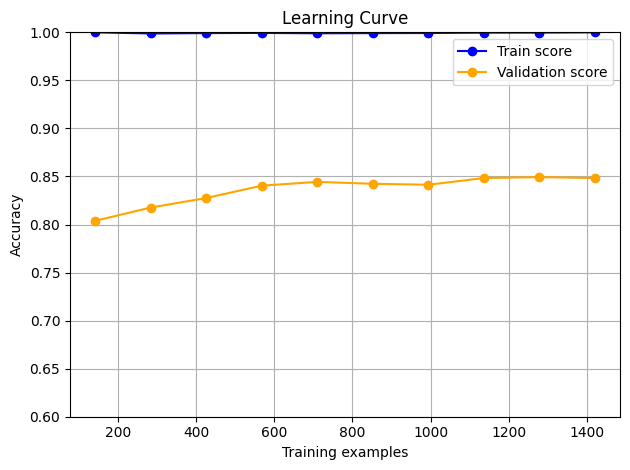

In [44]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# 学習曲線の計算
train_sizes, train_scores, val_scores = learning_curve(
    model, x_train, y_train,
    cv=5,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.ylim(0.6, 1.0)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()